In [1]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import scipy.stats as st
import numpy as np




In [2]:
# data files
LTC_assist_path = "Resources/Health_Data_Summary_ByAssist.csv"

#read files
Health_Data_Summary_ByAssist_df = pd.read_csv(LTC_assist_path)
Health_Data_Summary_ByAssist_df.head()

,Long Term Condition,Sex,Need Assistance,No Assistance,Not stated,Total By Assistance
0,Arthritis,Male,154778,626940,8337,790053
1,Asthma,Male,80262,822180,6964,909407
2,Cancer,Male,71390,275073,3472,349930
3,Dementia,Male,61589,13947,2621,78154
4,Diabetes,Male,119931,527096,6574,653595


In [3]:
#drop no Long term health condition from df as we are looking at trends for those WITH a long term condition
Health_Data_Summary_ByAssist_df = pd.read_csv("Resources/Health_Data_Summary_ByAssist.csv", index_col="Long Term Condition")
Health_Data_Summary_ByAssist_df.drop(["No long-term health condition"], inplace = True)
Health_Data_Summary_ByAssist_df

,Sex,Need Assistance,No Assistance,Not stated,Total By Assistance
Long Term Condition,,,,,
Arthritis,Male,154778,626940,8337,790053
Asthma,Male,80262,822180,6964,909407
Cancer,Male,71390,275073,3472,349930
Dementia,Male,61589,13947,2621,78154
Diabetes,Male,119931,527096,6574,653595
Heart disease,Male,130359,468132,6603,605094
Kidney disease,Male,38783,79023,1470,119271
Lung condition,Male,65843,144883,2575,213301
Mental health condition,Male,196421,668330,7778,872532


In [4]:
#aggregate data for stacked bar chart
agg_assist = Health_Data_Summary_ByAssist_df.groupby(['Long Term Condition', 'Sex'])['No Assistance', 'Need Assistance', 'Not stated'].sum().unstack().fillna(0)
agg_assist

/var/folders/yw/zphshm411rd_wwltgd70q5040000gn/T/ipykernel_7237/959882607.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_assist = Health_Data_Summary_ByAssist_df.groupby(['Long Term Condition', 'Sex'])['No Assistance', 'Need Assistance', 'Not stated'].sum().unstack().fillna(0)


No Assistance         Need Assistance          \
Sex                            Female    Male          Female    Male   
Long Term Condition                                                     
Arthritis                     1035446  626940          310050  154778   
Asthma                        1023673  822180          125606   80262   
Cancer                         299688  275073           78681   71390   
Dementia                        13354   13947           93298   61589   
Diabetes                       407599  527096          131448  119931   
Heart disease                  257453  468132          130979  130359   
Kidney disease                  68193   79023           42592   38783   
Lung condition                 150030  144883           74896   65843   
Mental health condition       1114471  668330          233132  196421   
Not stated                     362601  366541           15490   16670   
Stroke                          51927   70711           53663   54758   

                        Not stated          
Sex                         Female    Male  
Long Term Condition                         
Arthritis                    14841    8337  
Asthma                        9331    6964  
Cancer                        3853    3472  
Dementia                      4352    2621  
Diabetes                      6071    6574  
Heart disease                 5573    6603  
Kidney disease                1715    1470  
Lung condition                2887    2575  
Mental health condition      11410    7778  
Not stated                  605578  699368  
Stroke                        1731    1819

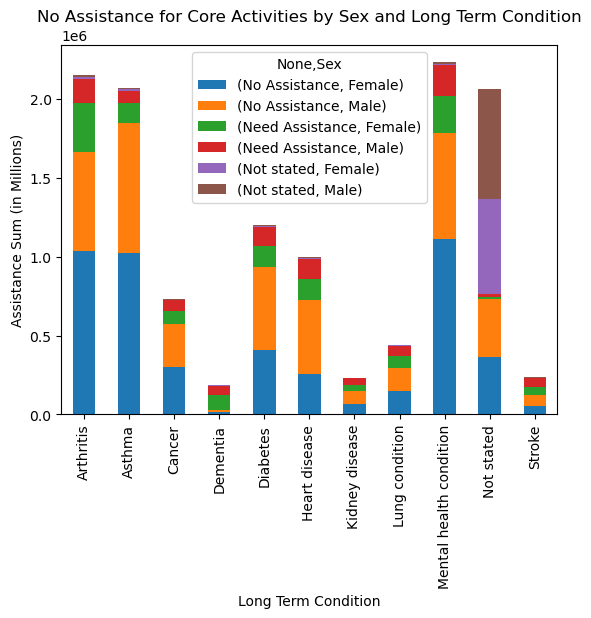

In [26]:
#stacked bar chart
agg_assist.plot(kind='bar', stacked=True)

plt.title('No Assistance for Core Activities by Sex and Long Term Condition')
plt.xlabel("Long Term Condition")
plt.ylabel("Assistance Sum (in Millions)")
plt.xticks(rotation=90, ha='center')

plt.savefig('output_data/Fig8.png')
plt.show()


In [6]:
#Create proportions for an assistance type by Longterm condition 
LTC_gp = Health_Data_Summary_ByAssist_df.groupby(["Long Term Condition"])

In [7]:
#Number per LTC - sum values
num_per_LTC = LTC_gp["Need Assistance"].sum()
num_per_LTC.head()

Long Term Condition
Arthritis    464828
Asthma       205868
Cancer       150071
Dementia     154887
Diabetes     251379
Name: Need Assistance, dtype: int64

In [8]:
tnum_per_LTC = LTC_gp["Total By Assistance"].sum()
tnum_per_LTC.head()

Long Term Condition
Arthritis    2150391
Asthma       2068020
Cancer        732155
Dementia      189157
Diabetes     1198716
Name: Total By Assistance, dtype: int64

In [9]:
#Summary LTC and proportion needing assistance df
S_Long_Term_Conditions_df = pd.DataFrame({"Total Needing Assistance": num_per_LTC,
                                          "Total By Assistance": tnum_per_LTC})
S_Long_Term_Conditions_df

,Total Needing Assistance,Total By Assistance
Long Term Condition,,
Arthritis,464828,2150391
Asthma,205868,2068020
Cancer,150071,732155
Dementia,154887,189157
Diabetes,251379,1198716
Heart disease,261338,999096
Kidney disease,81375,231777
Lung condition,140739,441110
Mental health condition,429553,2231543


In [10]:
#Calculate proportion/quotient  that Need Assistance with core activities by Long Term Condition
prop_NA_of_totalNA = S_Long_Term_Conditions_df["Total Needing Assistance"] / S_Long_Term_Conditions_df["Total By Assistance"] * 100
S_Long_Term_Conditions_df["Proportion Needing Assistance"] = prop_NA_of_totalNA 
S_Long_Term_Conditions_df.head()


,Total Needing Assistance,Total By Assistance,Proportion Needing Assistance
Long Term Condition,,,
Arthritis,464828,2150391,21.615976
Asthma,205868,2068020,9.954836
Cancer,150071,732155,20.497162
Dementia,154887,189157,81.882775
Diabetes,251379,1198716,20.970689


In [11]:
#Bar Chart DataFrame
Assistance_Proportion_by_LTC = pd.DataFrame({"Proportion Needing Assistance":prop_NA_of_totalNA})
Assistance_Proportion_by_LTC


,Proportion Needing Assistance
Long Term Condition,
Arthritis,21.615976
Asthma,9.954836
Cancer,20.497162
Dementia,81.882775
Diabetes,20.970689
Heart disease,26.157446
Kidney disease,35.109178
Lung condition,31.905647
Mental health condition,19.249147


In [12]:
Assistance_Proportion_by_LTC.to_csv("Resources/Assistance_Proportion_by_LTC.csv", index=False, header=True)

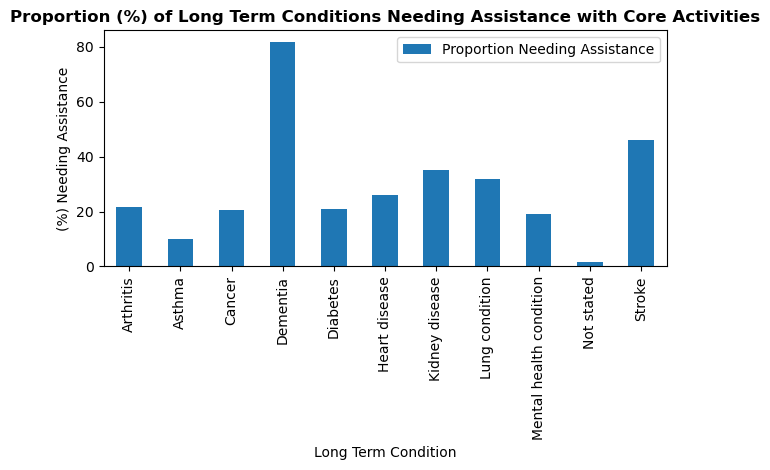

In [13]:
#Bar Chart
pd_bar_LTC_quotient = Assistance_Proportion_by_LTC.plot(kind='bar', width=0.5)
pd_bar_LTC_quotient.set_title(label='Proportion (%) of Long Term Conditions Needing Assistance with Core Activities', fontweight = 'bold')
pd_bar_LTC_quotient.set_xlabel("Long Term Condition")
pd_bar_LTC_quotient.set_ylabel("(%) Needing Assistance")
plt.tight_layout()
plt.savefig('output_data/Fig9.png')
plt.show()

In [14]:
#read labour csv file
LTC_lab_path = "Resources/Health_Data_Summary_ByLabour.csv"
Health_Data_Summary_ByLabour_df = pd.read_csv(LTC_lab_path)
Health_Data_Summary_ByLabour_df.head()

,Long Term Condition,Employed,UnEmployed,Not in the Labour Force,Not stated,Total
0,Arthritis,635067,32293,1444340,34684,2146388
1,Asthma,1036377,60083,663091,14273,1773823
2,Cancer,224738,8252,484897,9997,727885
3,Dementia,3719,425,169109,15604,188857
4,Diabetes,396636,25010,751498,18252,1191393


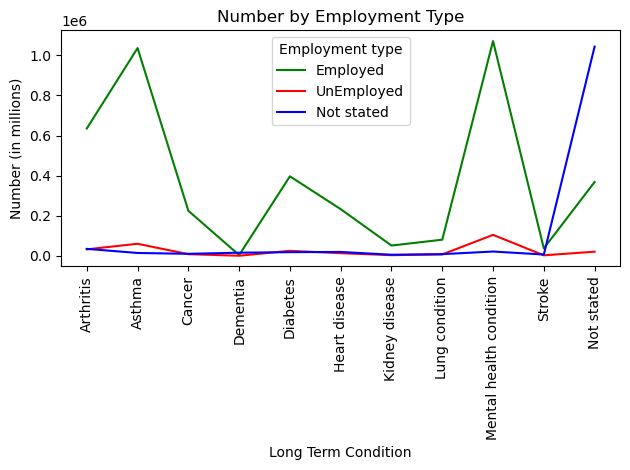

In [27]:
#Line chart of LTC by Employment status where a long term condition is declared - NOt in the labour force removed as assumed retired or ineligible

plt.plot(Health_Data_Summary_ByLabour_df['Employed'], label='Employed', color='green')
plt.plot(Health_Data_Summary_ByLabour_df['UnEmployed'], label='UnEmployed', color='red')
plt.plot(Health_Data_Summary_ByLabour_df['Not stated'], label='Not stated', color='blue')
x_axis = np.arange(len(Health_Data_Summary_ByLabour_df['Employed']))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Health_Data_Summary_ByLabour_df['Long Term Condition'], rotation="vertical")
plt.legend(title='Employment type')
plt.ylabel('Number (in millions)')
plt.xlabel('Long Term Condition')
plt.title('Number by Employment Type')
plt.tight_layout()
plt.savefig('output_data/Fig10.png')
plt.show()
                 


In [16]:
#Q: What is the relationship between Needing Assistance and being Employed if you have a long term health condition?

In [17]:
Health_Data_Summary_ByLabour_df.columns
Health_Data_Summary_ByLabour_df.set_index(keys='Long Term Condition')

,Employed,UnEmployed,Not in the Labour Force,Not stated,Total
Long Term Condition,,,,,
Arthritis,635067,32293,1444340,34684,2146388
Asthma,1036377,60083,663091,14273,1773823
Cancer,224738,8252,484897,9997,727885
Dementia,3719,425,169109,15604,188857
Diabetes,396636,25010,751498,18252,1191393
Heart disease,232810,13156,725738,19325,991024
Kidney disease,51256,3303,167225,5440,227223
Lung condition,80487,6921,339534,8420,435362
Mental health condition,1071332,104578,935705,21395,2133007


In [18]:
Health_Data_Summary_ByLabour_df.head()

,Long Term Condition,Employed,UnEmployed,Not in the Labour Force,Not stated,Total
0,Arthritis,635067,32293,1444340,34684,2146388
1,Asthma,1036377,60083,663091,14273,1773823
2,Cancer,224738,8252,484897,9997,727885
3,Dementia,3719,425,169109,15604,188857
4,Diabetes,396636,25010,751498,18252,1191393


In [19]:
Health_Data_Summary_ByLabour_df.reset_index()

,index,Long Term Condition,Employed,UnEmployed,Not in the Labour Force,Not stated,Total
0,0,Arthritis,635067,32293,1444340,34684,2146388
1,1,Asthma,1036377,60083,663091,14273,1773823
2,2,Cancer,224738,8252,484897,9997,727885
3,3,Dementia,3719,425,169109,15604,188857
4,4,Diabetes,396636,25010,751498,18252,1191393
5,5,Heart disease,232810,13156,725738,19325,991024
6,6,Kidney disease,51256,3303,167225,5440,227223
7,7,Lung condition,80487,6921,339534,8420,435362
8,8,Mental health condition,1071332,104578,935705,21395,2133007
9,9,Stroke,37117,2548,187179,6456,233305


In [20]:
Assistance_Proportion_by_LTC.reset_index()

,Long Term Condition,Proportion Needing Assistance
0,Arthritis,21.615976
1,Asthma,9.954836
2,Cancer,20.497162
3,Dementia,81.882775
4,Diabetes,20.970689
5,Heart disease,26.157446
6,Kidney disease,35.109178
7,Lung condition,31.905647
8,Mental health condition,19.249147
9,Not stated,1.556441


In [21]:
merge_Labour_NA = pd.merge(Health_Data_Summary_ByLabour_df, Assistance_Proportion_by_LTC, on="Long Term Condition", how="outer")
merge_Labour_NA

,Long Term Condition,Employed,UnEmployed,Not in the Labour Force,Not stated,Total,Proportion Needing Assistance
0,Arthritis,635067,32293,1444340,34684,2146388,21.615976
1,Asthma,1036377,60083,663091,14273,1773823,9.954836
2,Cancer,224738,8252,484897,9997,727885,20.497162
3,Dementia,3719,425,169109,15604,188857,81.882775
4,Diabetes,396636,25010,751498,18252,1191393,20.970689
5,Heart disease,232810,13156,725738,19325,991024,26.157446
6,Kidney disease,51256,3303,167225,5440,227223,35.109178
7,Lung condition,80487,6921,339534,8420,435362,31.905647
8,Mental health condition,1071332,104578,935705,21395,2133007,19.249147
9,Stroke,37117,2548,187179,6456,233305,46.213487


In [22]:
#Calculate proportion/quotient who are employed by Long Term Condition
prop_Employed_of_total = merge_Labour_NA["Employed"] / merge_Labour_NA["Total"] * 100
merge_Labour_NA["Proportion Employed"] = prop_Employed_of_total
merge_Labour_NA = merge_Labour_NA.dropna()
print(merge_Labour_NA)

        Long Term Condition  Employed  UnEmployed  Not in the Labour Force  \
0                 Arthritis    635067       32293                  1444340   
1                    Asthma   1036377       60083                   663091   
2                    Cancer    224738        8252                   484897   
3                  Dementia      3719         425                   169109   
4                  Diabetes    396636       25010                   751498   
5             Heart disease    232810       13156                   725738   
6            Kidney disease     51256        3303                   167225   
7            Lung condition     80487        6921                   339534   
8   Mental health condition   1071332      104578                   935705   
9                    Stroke     37117        2548                   187179   
10               Not stated    368330       20588                   255409   

    Not stated    Total  Proportion Needing Assistance  Proport

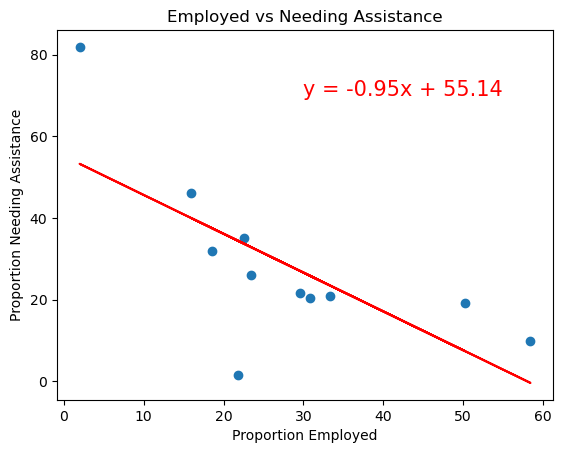

In [23]:
# Add the linear regression equation and line to plot
from scipy.stats import linregress
x_values = merge_Labour_NA['Proportion Employed']
y_values = merge_Labour_NA["Proportion Needing Assistance"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,70),fontsize=15,color="red")
plt.xlabel('Proportion Employed')
plt.ylabel('Proportion Needing Assistance')
plt.title("Employed vs Needing Assistance")
plt.savefig('output_data/Fig11.png')
plt.show()